In [21]:
import pandas as pd 
DF = pd.read_csv('xbox_final_cleaned_results.csv')
DF.head(10)

,Game,MS_Store_Link,ProductID,System,xCloud,Status,Added,Removed,Months,Release,...,Completion,Genre,Series X|S,Owner Notes,ESRB,ESRB Content Descriptors,Community Notes,Status.1,Added.1,Delay
0,MIO: Memories in Orbit,https://www.xbox.com/en-US/games/store/mio-mem...,9np86k57sqm3,Xbox / PC,Yes,Active,Jan 2026,NaN,0.20,Dec 2025,...,NaN,NaN,NaN,Handheld Optimized,NaN,NaN,NaN,TBD,NaN,0.20
1,Bratz: Rhythm & Style,https://www.xbox.com/en-us/games/store/bratz-r...,9p76mmjg50ds,Xbox / PC,Yes,Active,Dec 2025,NaN,0.27,Sep 2025,...,NaN,Action-Adventure,NaN,NaN,NaN,NaN,NaN,Active,Oct 2025,-2.33
2,Dome Keeper,https://www.xbox.com/en-us/games/store/dome-ke...,9p8xkv2d5dz5,Xbox,Yes,Active,Dec 2025,NaN,0.33,Sep 2022,...,5.0,Action,NaN,Handheld Optimized,NaN,NaN,NaN,Active,Oct 2025,-2.27
3,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,Dec 2025,NaN,0.50,Dec 2025,...,NaN,NaN,NaN,Handheld Optimized,NaN,NaN,NaN,TBD,NaN,0.50
4,Lost Records: Bloom & Rage,https://www.xbox.com/en-us/games/store/lost-re...,9n3f1lw9hc6c,Xbox / PC,Yes,Active,Dec 2025,NaN,0.57,Feb 2025,...,11.0,Action-Adventure,Exclusive,NaN,NaN,NaN,NaN,Active,Oct 2025,-2.03
5,Marvel Cosmic Invasion,https://www.xbox.com/en-us/games/store/marvel-...,9n79tqtztqq4,Xbox / PC,Yes,Active,Dec 2025,NaN,0.60,Dec 2025,...,NaN,Beat ’em up,NaN,Handheld Optimized,NaN,NaN,NaN,TBD,NaN,0.60
6,Kill It With Fire! 2,https://www.xbox.com/en-us/games/store/kill-it...,9mxhl3tt792f,Xbox / PC,Yes,Active,Nov 2025,NaN,0.80,Nov 2025,...,NaN,Shooter,NaN,NaN,NaN,NaN,NaN,Active,Oct 2025,-1.80
7,Monsters are Coming! Rock & Road,https://www.xbox.com/en-us/games/store/monster...,9pjbkf27c16m,PC,NaN,Active,Nov 2025,NaN,0.97,Nov 2025,...,NaN,Action-Adventure,NaN,NaN,NaN,NaN,NaN,TBD,NaN,0.97
8,Moonlighter 2: The Endless Vault (Game Preview),https://www.xbox.com/en-us/games/store/moonlig...,9ndjx252q5bw,PC,NaN,Active,Nov 2025,NaN,1.00,Nov 2025,...,NaN,Action-Adventure,NaN,NaN,NaN,NaN,NaN,TBD,NaN,1.00
9,Winter Burrow,https://www.xbox.com/en-us/games/store/winter-...,9nd3httq0gkb,Xbox / PC,Yes,Active,Nov 2025,NaN,1.23,Nov 2025,...,NaN,Action-Adventure,NaN,NaN,NaN,NaN,NaN,TBD,NaN,1.23


In [22]:
import json
with open ('xbox_data_20260110_0211.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

df.columns


Index(['product_id', 'title', 'publisher', 'developer', 'release_date',
       'short_description', 'bundle_count', 'is_xpa', 'asset_count',
       'category', 'esrb', 'esrb_descriptors', 'has_gamepass_remediation',
       'prices', 'rating_alltime.AggregateTimeSpan',
       'rating_alltime.AverageRating', 'rating_alltime.PlayCount',
       'rating_alltime.RatingCount', 'rating_alltime.RentalCount',
       'rating_alltime.TrialCount', 'rating_alltime.PurchaseCount',
       'rating_7_days.AggregateTimeSpan', 'rating_7_days.AverageRating',
       'rating_7_days.PlayCount', 'rating_7_days.RatingCount',
       'rating_7_days.RentalCount', 'rating_7_days.TrialCount',
       'rating_7_days.PurchaseCount', 'rating_30_days.AggregateTimeSpan',
       'rating_30_days.AverageRating', 'rating_30_days.PlayCount',
       'rating_30_days.RatingCount', 'rating_30_days.RentalCount',
       'rating_30_days.TrialCount', 'rating_30_days.PurchaseCount'],
      dtype='object')

Backfill the genre and esrb ratings based on the data that we got from the csv and also add in the metacritic score as well

In [23]:
DF = DF.merge(df, right_on = 'product_id', left_on = 'ProductID')


In [24]:
DF.columns

Index(['Game', 'MS_Store_Link', 'ProductID', 'System', 'xCloud', 'Status',
       'Added', 'Removed', 'Months', 'Release', 'Age', 'Metacritic',
       'Completion', 'Genre', 'Series X|S', 'Owner Notes', 'ESRB',
       'ESRB Content Descriptors', 'Community Notes', 'Status.1', 'Added.1',
       'Delay', 'product_id', 'title', 'publisher', 'developer',
       'release_date', 'short_description', 'bundle_count', 'is_xpa',
       'asset_count', 'category', 'esrb', 'esrb_descriptors',
       'has_gamepass_remediation', 'prices',
       'rating_alltime.AggregateTimeSpan', 'rating_alltime.AverageRating',
       'rating_alltime.PlayCount', 'rating_alltime.RatingCount',
       'rating_alltime.RentalCount', 'rating_alltime.TrialCount',
       'rating_alltime.PurchaseCount', 'rating_7_days.AggregateTimeSpan',
       'rating_7_days.AverageRating', 'rating_7_days.PlayCount',
       'rating_7_days.RatingCount', 'rating_7_days.RentalCount',
       'rating_7_days.TrialCount', 'rating_7_days.PurchaseCo

In [25]:
def backfill_columns(DF):   
    DF['Genre'] = DF['Genre'].fillna(DF['category_x'])
    DF['ESRB Content Descriptors']= DF['ESRB Content Descriptors'].fillna(DF['esrb_descriptors_y'])
    DF = DF.dropna(subset=['Genre', 'ESRB Content Descriptors'])
    
    return DF

,Genre,Game,ProductID
0,NaN,Routine,9PCJT6TLCGGV
6,NaN,Moonsweeper,9WZDNCRFHWCN
69,NaN,Okie Dokie,9MWQ4NQ5WX37
70,NaN,Skate Boardin',9PHF9K5Q6ZLZ
71,NaN,Skeleton+,9P7QR4N2DXT6
74,NaN,Subterranea,BQT43569VWF2
82,NaN,Activision Prototype #1,BTB6374NZGV3
83,NaN,Bridge,9NFGR7284HXC
85,NaN,Checkers,9N83WWN31GFP


In [29]:
publisher_map = {
    # 2K / Take-Two
    '2k': '2k',
    '2k games': '2k',
    '2k publishing': '2k',
    'visual concepts': '2k',
    'private division': 'take-two',
    'rockstar games': 'take-two',
    'gearbox software': 'take-two',
    'hangar 13': 'take-two',
    
    # Activision Blizzard
    'activision': 'activision',
    'activision publishing inc.': 'activision',
    'blizzard entertainment': 'blizzard',
    
    # Bandai Namco / D3
    'bandai namco entertainment america': 'bandai namco',
    'bandai namco entertainment': 'bandai namco',
    'bandai namco entertainment america inc.': 'bandai namco',
    'bandai namco entertainment inc.': 'bandai namco',
    'bandai namco studios inc.': 'bandai namco',
    'bandai namco studios': 'bandai namco',
    'namco bandai games america': 'bandai namco',
    'namco bandai games america inc.': 'bandai namco',
    'd3 publisher': 'd3 publisher',
    'd3publisher of america, inc.': 'd3 publisher',
    'd3publisher of america, inc': 'd3 publisher',
    'd3publisher, inc.': 'd3 publisher',
    'd3 publisher of america, inc.': 'd3 publisher',
    'd3 publisher of america inc.': 'd3 publisher',
    
    # Capcom
    'capcom': 'capcom',
    'capcom u.s.a., inc': 'capcom',
    'capcom entertainment, inc.': 'capcom',
    '株式会社 カプコン': 'capcom',
    'capcom co., ltd.': 'capcom',
    'capcom co,. ltd.': 'capcom',
    
    # Daedalic / Nacon
    'daedalic entertainment': 'daedalic',
    'daedalic entertainment gmbh': 'daedalic',
    'big ant studios': 'nacon',
    'big ant studios pty': 'nacon',
    'passtech games': 'nacon',
    
    # Deep Silver / Embracer
    'deep silver': 'deep silver',
    'deep silver dambuster studios': 'deep silver',
    'deep silver, inxile entertainment': 'deep silver',
    'deep silver, koch media': 'deep silver',
    'koch media': 'deep silver',
    'prime matter': 'deep silver',
    'thq nordic': 'thq nordic',
    'thq nordic gmbh': 'thq nordic',
    'nordic games': 'thq nordic',
    'nordic games gmbh': 'thq nordic',
    'coffee stain publishing': 'coffee stain',
    'coffee stain publishing ab': 'coffee stain',
    'milestone s.r.l.': 'milestone',
    'ravenscourt': 'ravenscourt',
    'ravenscourt games': 'ravenscourt',
    
    # Disney
    'disney': 'disney',
    'disney interactive studios': 'disney',
    'disney interactive': 'disney',
    'disney bolt': 'disney',
    'lucasfilm': 'disney',
    'lucasarts': 'disney',
    
    # Electronic Arts
    'electronic arts': 'electronic arts',
    'electronic arts ': 'electronic arts',
    'electronic arts inc.': 'electronic arts',
    'ea': 'electronic arts',
    'ea sports': 'electronic arts',
    'ea sports™': 'electronic arts',
    'ea vancouver': 'electronic arts',
    'ea digital illusions ce ab': 'electronic arts',
    'codemasters': 'electronic arts',
    'codemasters software company limited': 'electronic arts',
    'popcap': 'electronic arts',
    'popcap games': 'electronic arts',
    'popcap games, inc.': 'electronic arts',
    
    # Focus Entertainment
    'focus entertainment': 'focus entertainment',
    'focus home interactive': 'focus entertainment',
    'dotemu': 'focus entertainment',
    'the arcade crew': 'focus entertainment',
    
    # Microsoft / Xbox Game Studios
    'xbox game studios': 'xbox game studios',
    'xbox game studios ': 'xbox game studios',
    'xbox games studios, rare ltd': 'xbox game studios',
    'microsoft': 'xbox game studios',
    'microsoft studios': 'xbox game studios',
    'microsoft game studios': 'xbox game studios',
    'microsoft corporation': 'xbox game studios',
    'xbox live arcade': 'xbox game studios',
    '343 industries': 'xbox game studios',
    'the coalition': 'xbox game studios',
    'turn 10 studios': 'xbox game studios',
    'rare': 'xbox game studios',
    'mojang studios': 'xbox game studios',
    'double fine': 'xbox game studios',
    'double fine productions': 'xbox game studios',
    'double fine productions, inc.': 'xbox game studios',
    
    # SEGA
    'sega': 'sega',
    'sega europe ltd': 'sega',
    'sega of america': 'sega',
    'sega of america, inc.': 'sega',
    'ryu ga gotoku studio': 'sega',
    
    # Square Enix
    'square enix': 'square enix',
    'square enix ltd': 'square enix',
    'square enix co., ltd.': 'square enix',
    'square enix ltdio-interactive a/s': 'square enix',
    'square enix ltdi-interactive a/s': 'square enix',
    
    # Team17
    'team17': 'team17',
    'team17 ': 'team17',
    'team 17': 'team17',
    'team17 digital ltd': 'team17',
    'team17 digital ltd.': 'team17',
    
    # tinyBuild
    'tinybuild': 'tinybuild',
    'tinybuild games': 'tinybuild',
    
    # Others
    'another indie': 'another indie',
    'another indie studio': 'another indie',
    'aspyr': 'aspyr',
    'aspyr media': 'aspyr',
    'astragon entertainment': 'astragon entertainment',
    'astragon entertainment gmbh': 'astragon entertainment',
    'fatshark': 'fatshark',
    'fatshark ab': 'fatshark',
    'fatshark studios ab': 'fatshark',
    'flashbulb': 'flashbulb',
    'flashbulb games': 'flashbulb',
    'headup': 'headup',
    'headup games': 'headup',
    'headup gmbh': 'headup',
    'hypetrain digital': 'hypetrain digital',
    'image & form': 'image & form',
    'image & form games': 'image & form',
    'image & form international ab': 'image & form',
    'jackbox games': 'jackbox games',
    'jackbox games, inc.': 'jackbox games',
    'kalypso media': 'kalypso media',
    'kalypso media group gmbh': 'kalypso media',
    'kalypso media group': 'kalypso media',
    'konami': 'konami',
    'konami digital entertainment': 'konami',
    'konami digital entertainment, inc.': 'konami',
    'playway': 'playway',
    'playway sa': 'playway',
    'playway s.a.': 'playway',
    'pm studios, inc.': 'pm studios',
    'pm-studios, inc.': 'pm studios',
    'spike': 'spike chunsoft',
    'spike chunsoft': 'spike chunsoft',
    'spike chunsoft co., ltd.': 'spike chunsoft',
    'telltale': 'telltale',
    'telltale games': 'telltale',
    'valve': 'valve',
    'versus evil': 'versus evil',
    'versus evil, llc.': 'versus evil',
    'arc system works': 'arc systems',
    'ubisoft entertainment': 'ubisoft',
    'wired productions ltd': 'wired productions',
    'snk playmore corporation':'snk playmore',
    'unknown worlds entertainment': 'unknown worlds',
    'thq nordic': 'thq',
    'tecmo koei america': 'tecmo'
    
}
DF['publisher'] = DF['publisher'].str.strip().str.lower()
DF['publisher'] = DF['publisher'].replace(publisher_map)

In [31]:
def calculate_game_metrics(df):
    """Add calculated metric columns directly to DataFrame."""
    # Get rating counts
    r7 = pd.to_numeric(df["rating_7_days.RatingCount"], errors='coerce').fillna(0)
    r30 = pd.to_numeric(df["rating_30_days.RatingCount"], errors='coerce').fillna(0)
    r_all = pd.to_numeric(df["rating_alltime.RatingCount"], errors='coerce').fillna(0)
    
    # Get ratings
    rating_7d = pd.to_numeric(df["rating_7_days.AverageRating"], errors='coerce').fillna(0)
    rating_30d = pd.to_numeric(df["rating_30_days.AverageRating"], errors='coerce').fillna(0)
    rating_all = pd.to_numeric(df["rating_alltime.AverageRating"], errors='coerce').fillna(0)

    
    # Parse dates
    release_date = pd.to_datetime(df["Release"], errors='coerce')
    gamepass_date = pd.to_datetime(df["Added"], errors='coerce')

    # Normalize timezones: make sure datetimes are tz-naive so subtraction works
    # If series are timezone-aware, convert to naive by removing tz info.
    try:
        if getattr(release_date.dt, 'tz', None) is not None:
            release_date = release_date.dt.tz_convert(None)
    except Exception:
        # fallback: attempt elementwise removal
        release_date = release_date.apply(lambda x: x.tz_convert(None) if getattr(x, 'tzinfo', None) is not None else x)

    try:
        if getattr(gamepass_date.dt, 'tz', None) is not None:
            gamepass_date = gamepass_date.dt.tz_convert(None)
    except Exception:
        gamepass_date = gamepass_date.apply(lambda x: x.tz_convert(None) if getattr(x, 'tzinfo', None) is not None else x)
    
    # Calculate time deltas using a tz-naive 'now'
    now = pd.Timestamp.now()
    df['days_since_release'] = (now - release_date).dt.days
    df['days_since_gp_add'] = (now - gamepass_date).dt.days
    
    # Calculate metrics
    df['momentum'] = ((r7 / r30 * 100).fillna(0)).round(2)
    df['discovery_capture'] = ((r7 / r_all * 100).fillna(0)).round(2)
    df['quality_retention'] = (rating_30d - rating_all).round(3)
    df['rating_trend_7d_vs_alltime'] = (rating_7d - rating_all).round(3)
    df['is_day_one_gp'] = (df['days_since_gp_add'] <= 1) & (gamepass_date.notna())
    
    return df
calculate_game_metrics(DF)

/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_92735/4167329896.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  release_date = pd.to_datetime(df["Release"], errors='coerce')
/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_92735/4167329896.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gamepass_date = pd.to_datetime(df["Added"], errors='coerce')


,Game,MS_Store_Link,ProductID,System,xCloud,Status,Added,Removed,Months,Release,...,rating_30_days.RentalCount,rating_30_days.TrialCount,rating_30_days.PurchaseCount,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,Dec 2025,NaN,0.50,Dec 2025,...,0,0,0,40,40,11.58,7.37,0.2,0.2,False
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,Nov 2025,NaN,1.27,Dec 2014,...,0,0,0,4058,70,25.00,0.14,0.0,0.0,False
2,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,Nov 2025,NaN,1.27,Dec 2014,...,0,0,0,4058,70,25.00,0.14,0.0,0.0,False
3,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,NaN,Active,Nov 2025,NaN,1.43,Nov 2025,...,0,0,0,70,70,5.88,0.51,0.6,1.5,False
4,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,NaN,Active,Oct 2025,NaN,1.83,Oct 2025,...,0,0,0,101,101,12.50,0.46,0.3,-2.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,Assassin's Creed II,https://www.xbox.com/en-us/games/store/Assassi...,BNVMH8NVCRCT,XB360/OG Xbox,NaN,GwG Permanent,Jul 2013,Jul 2013,0.47,Nov 2009,...,0,0,0,5914,4576,15.38,0.05,-0.9,-1.4,False
1534,Defense Grid: The Awakening,https://www.xbox.com/en-us/games/store/Defense...,BRGZNMD482L8,XB360/OG Xbox,NaN,GwG Permanent,Jul 2013,Jul 2013,0.47,Mar 2009,...,0,0,0,6159,4576,0.00,0.00,-4.3,-4.3,False
1535,Defense Grid: The Awakening,https://www.xbox.com/en-us/games/store/Defense...,BRGZNMD482L8,XB360/OG Xbox,NaN,GwG Permanent,Jul 2013,Jul 2013,0.47,Mar 2009,...,0,0,0,6159,4576,0.00,0.00,-4.3,-4.3,False
1536,Fable III,https://www.xbox.com/en-us/games/store/Fable-I...,BR46KM4D5B9L,XB360/OG Xbox,NaN,GwG Permanent,Jun 2013,Jun 2013,0.67,Oct 2010,...,0,0,0,5580,4606,34.62,0.22,0.2,0.3,False


In [ ]:
import pandas as pd
def Genre_performance_analysis(df):
    """Analyze performance metrics by Genre."""
    Genre_stats = df.groupby('Genre').agg({
        'momentum': ['median', 'mean', 'std'],
        'discovery_capture': ['median', 'mean'],
        'quality_retention': ['median', 'mean'],
        'rating_7_days.RatingCount': ['mean', 'std', 'median'],
        'rating_30_days.RatingCount': ['mean', 'std', 'median'],
        'rating_alltime.RatingCount': ['mean', 'std', 'median'],
        'rating_alltime.AverageRating': ['mean', 'std', 'median'],
        'rating_30_days.AverageRating': ['mean', 'std', 'median'],
        'rating_7_days.AverageRating': ['mean', 'std', 'median'],
        'rating_trend_7d_vs_alltime': ['mean', 'std', 'median'],
        'title': 'count'  # Number of games per Genre
    }).round(2)
    
    
    Genre_stats.columns = ['_'.join(col).strip() for col in Genre_stats.columns.values]
    
    # Move 'Genre' from the index into a regular column
    Genre_stats = Genre_stats.reset_index()
    
    # Now rename works easily because it's just a single string
    Genre_stats = Genre_stats.rename(columns={'title_count': 'game_count'})
    
    return Genre_stats

def Genre_gamepass_comparison(df):
    """Compare Game Pass vs Non-Game Pass games by Genre."""
    comparison = df.groupby(['Genre', 'has_gamepass_remediation']).agg({ #using the agg fucntion to peform a series of operations on the grouped data to get summary statistics for each Genre and Game Pass status
        'momentum': ['mean', 'std', 'median'],
        'discovery_capture': ['mean', 'std', 'median'],
        'quality_retention': ['mean', 'std', 'median'],
        'rating_7_days.RatingCount': ['mean', 'std', 'median'],
        'rating_30_days.RatingCount': ['mean', 'std', 'median'],
        'rating_alltime.RatingCount': ['mean', 'std', 'median'],
        'rating_alltime.AverageRating': ['mean', 'std', 'median'],
        'rating_30_days.AverageRating': ['mean', 'std', 'median'],
        'rating_7_days.AverageRating': ['mean', 'std', 'median'],
        'rating_trend_7d_vs_alltime': ['mean', 'std', 'median'],
        'has_gamepass_remediation': 'sum',  # Number of games on GP
        'title': 'count'  # Total games
    }).round(2)
    
    
    comparison.columns = ['_'.join(col).strip() for col in comparison.columns.values]
    comparison = comparison.reset_index()
    comparison = comparison.rename(columns={'title': 'game_count'})
    return comparison

# 1. Generate the Genre Baselines
Genre_perf = Genre_performance_analysis(DF)
display(Genre_perf)

# 2. Generate the Game Pass Comparison
Genre_gp = Genre_gamepass_comparison(DF)
display(Genre_gp)


,Genre,momentum_median,momentum_mean,momentum_std,discovery_capture_median,discovery_capture_mean,quality_retention_median,quality_retention_mean,rating_7_days.RatingCount_mean,rating_7_days.RatingCount_std,...,rating_30_days.AverageRating_mean,rating_30_days.AverageRating_std,rating_30_days.AverageRating_median,rating_7_days.AverageRating_mean,rating_7_days.AverageRating_std,rating_7_days.AverageRating_median,rating_trend_7d_vs_alltime_mean,rating_trend_7d_vs_alltime_std,rating_trend_7d_vs_alltime_median,game_count
0,Action,15.84,23.19,29.68,0.02,0.15,0.0,-0.66,3.28,10.92,...,3.16,1.83,3.90,2.07,2.17,1.00,-1.75,2.11,-2.4,74
1,Action / Action-Adventure,8.06,12.36,15.91,0.02,0.08,0.0,0.38,4.00,4.90,...,4.35,0.29,4.35,2.00,2.35,1.75,-1.98,2.07,-1.6,4
2,Action / Adventure,66.67,44.45,38.49,0.09,0.06,-0.3,-1.53,1.33,1.15,...,2.47,2.14,3.70,3.00,2.60,4.50,-1.00,2.60,0.5,3
3,Action / Adventure / Platformer,0.00,0.00,NaN,0.00,0.00,2.1,2.10,0.00,NaN,...,4.50,NaN,4.50,0.00,NaN,0.00,-2.40,NaN,-2.4,1
4,Action / Adventure / RPG,0.00,0.00,NaN,0.00,0.00,-2.1,-2.10,0.00,NaN,...,1.00,NaN,1.00,0.00,NaN,0.00,-3.10,NaN,-3.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Survival,20.00,15.56,15.18,0.02,0.08,0.0,-0.12,1.78,2.64,...,3.77,1.61,4.30,2.03,2.05,2.70,-1.86,2.06,-1.0,9
188,Tower Defense,0.00,0.00,0.00,0.00,0.00,-3.6,-3.60,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-3.60,0.00,-3.6,2
189,Trivia,15.79,15.79,NaN,0.62,0.62,-0.3,-0.30,3.00,NaN,...,2.20,NaN,2.20,4.00,NaN,4.00,1.50,NaN,1.5,1
190,Trivia/Board Game / Minigame Collection,100.00,77.78,38.49,0.40,0.34,1.0,1.03,1.33,0.58,...,4.23,0.68,4.00,4.67,0.58,5.00,1.47,0.40,1.7,3


,Genre,has_gamepass_remediation,momentum_mean,momentum_std,momentum_median,discovery_capture_mean,discovery_capture_std,discovery_capture_median,quality_retention_mean,quality_retention_std,...,rating_30_days.AverageRating_std,rating_30_days.AverageRating_median,rating_7_days.AverageRating_mean,rating_7_days.AverageRating_std,rating_7_days.AverageRating_median,rating_trend_7d_vs_alltime_mean,rating_trend_7d_vs_alltime_std,rating_trend_7d_vs_alltime_median,has_gamepass_remediation_sum,title_count
0,Action,False,21.09,31.52,0.00,0.12,0.41,0.00,-0.83,1.86,...,1.96,4.0,1.70,2.17,0.0,-2.16,2.07,-3.3,0,61
1,Action,True,33.04,16.16,26.22,0.27,0.24,0.15,0.15,0.44,...,0.79,3.7,3.79,1.09,3.7,0.17,0.93,0.2,13,13
2,Action / Action-Adventure,False,11.11,19.24,0.00,0.10,0.17,0.00,0.53,0.92,...,0.35,4.3,1.17,2.02,0.0,-2.63,1.96,-2.4,0,3
3,Action / Action-Adventure,True,16.13,NaN,16.13,0.04,NaN,0.04,-0.10,NaN,...,NaN,4.4,4.50,NaN,4.5,0.00,NaN,0.0,1,1
4,Action / Adventure,False,44.45,38.49,66.67,0.06,0.05,0.09,-1.53,2.14,...,2.14,3.7,3.00,2.60,4.5,-1.00,2.60,0.5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Survival,True,30.00,0.00,30.00,0.05,0.00,0.05,-0.50,0.00,...,0.00,3.2,2.70,0.00,2.7,-1.00,0.00,-1.0,2,2
242,Tower Defense,False,0.00,0.00,0.00,0.00,0.00,0.00,-3.60,0.00,...,0.00,0.0,0.00,0.00,0.0,-3.60,0.00,-3.6,0,2
243,Trivia,True,15.79,NaN,15.79,0.62,NaN,0.62,-0.30,NaN,...,NaN,2.2,4.00,NaN,4.0,1.50,NaN,1.5,1,1
244,Trivia/Board Game / Minigame Collection,False,77.78,38.49,100.00,0.34,0.16,0.40,1.03,0.65,...,0.68,4.0,4.67,0.58,5.0,1.47,0.40,1.7,0,3


In [36]:
import numpy as np
genre_all_baseline = Genre_perf[['Genre','momentum_mean', 'discovery_capture_median', 'quality_retention_median']].rename(columns={'momentum_mean':'momentum_genre_baseline', 'discovery_capture_median': 'discovery_capture_baseline', 'quality_retention_median' : 'quality_retention_baseline'})
merged = Genre_gp.merge(genre_all_baseline, on='Genre', how='left')

# differences (row-level: GP True/False rows will get baseline)
merged['momentum_diff_vs_baseline'] = merged['momentum_mean'] - merged['momentum_genre_baseline']
merged['momentum_pct_vs_baseline'] = merged['momentum_diff_vs_baseline'] / merged['momentum_genre_baseline'].replace(0,np.nan) * 100
merged['discovery_capture_diff_vs_baseline'] = merged['discovery_capture_median'] - merged['discovery_capture_baseline']
merged['quality_retention_vs_baseline'] = merged['quality_retention_median'] - merged['quality_retention_baseline']
merged['quality_pct_vs_baseline'] = merged['quality_retention_vs_baseline'] / merged['quality_retention_baseline'].replace(0,np.nan) * 100
merged.head(10)


,Genre,has_gamepass_remediation,momentum_mean,momentum_std,momentum_median,discovery_capture_mean,discovery_capture_std,discovery_capture_median,quality_retention_mean,quality_retention_std,...,has_gamepass_remediation_sum,title_count,momentum_genre_baseline,discovery_capture_baseline,quality_retention_baseline,momentum_diff_vs_baseline,momentum_pct_vs_baseline,discovery_capture_diff_vs_baseline,quality_retention_vs_baseline,quality_pct_vs_baseline
0,Action,False,21.09,31.52,0.00,0.12,0.41,0.00,-0.83,1.86,...,0,61,23.19,0.02,0.0,-2.10,-9.055627,-0.02,0.0,NaN
1,Action,True,33.04,16.16,26.22,0.27,0.24,0.15,0.15,0.44,...,13,13,23.19,0.02,0.0,9.85,42.475205,0.13,0.3,NaN
2,Action / Action-Adventure,False,11.11,19.24,0.00,0.10,0.17,0.00,0.53,0.92,...,0,3,12.36,0.02,0.0,-1.25,-10.113269,-0.02,0.0,NaN
3,Action / Action-Adventure,True,16.13,NaN,16.13,0.04,NaN,0.04,-0.10,NaN,...,1,1,12.36,0.02,0.0,3.77,30.501618,0.02,-0.1,NaN
4,Action / Adventure,False,44.45,38.49,66.67,0.06,0.05,0.09,-1.53,2.14,...,0,3,44.45,0.09,-0.3,0.00,0.000000,0.00,0.0,-0.0
5,Action / Adventure / Platformer,False,0.00,NaN,0.00,0.00,NaN,0.00,2.10,NaN,...,0,1,0.00,0.00,2.1,0.00,NaN,0.00,0.0,0.0
6,Action / Adventure / RPG,True,0.00,NaN,0.00,0.00,NaN,0.00,-2.10,NaN,...,1,1,0.00,0.00,-2.1,0.00,NaN,0.00,0.0,-0.0
7,Action / Adventure / RPG / Simulation,False,0.00,NaN,0.00,0.00,NaN,0.00,2.00,NaN,...,0,1,0.00,0.00,2.0,0.00,NaN,0.00,0.0,0.0
8,Action / Adventure / Shooter,False,40.00,NaN,40.00,0.06,NaN,0.06,0.90,NaN,...,0,1,40.00,0.06,0.9,0.00,0.000000,0.00,0.0,0.0
9,Action / Brawler,False,7.69,10.88,7.69,0.02,0.02,0.02,-1.80,3.82,...,0,2,13.82,0.03,0.4,-6.13,-44.356006,-0.01,-2.2,-550.0


In [37]:
#Now I want the differnece between each other as something to work with
pivot = merged.pivot_table(index = 'Genre', values = ['momentum_mean','discovery_capture_median', 'quality_retention_median'], columns= 'has_gamepass_remediation',fill_value = 0).reset_index()
#Flatten the columns so its easier to work with ltr
pivot.columns = [
f'{col[0]}_{col[1]}' if col[1] != '' else col[0]
    for col in pivot.columns
]

pivot['momentum_lift'] = pivot['momentum_mean_True'] - pivot['momentum_mean_False']
pivot['discovery_lift'] = pivot['discovery_capture_median_True'] - pivot['discovery_capture_median_False']
pivot['quality_lift'] = pivot['quality_retention_median_True'] - pivot['quality_retention_median_False']

print(pivot[['Genre', 'momentum_lift', 'discovery_lift', 'quality_lift']].head())

lift_results = pivot[['Genre', 'momentum_lift', 'discovery_lift', 'quality_lift']]

# 3. Merge them back into the original 'merged' dataframe
merged = merged.merge(lift_results, on='Genre', how='left')

                             Genre  momentum_lift  discovery_lift  \
0                           Action          11.95            0.15   
1        Action / Action-Adventure           5.02            0.04   
2               Action / Adventure         -44.45           -0.09   
3  Action / Adventure / Platformer           0.00            0.00   
4         Action / Adventure / RPG           0.00            0.00   

   quality_lift  
0           0.3  
1          -0.1  
2           0.3  
3          -2.1  
4          -2.1  


In [38]:
# 1. Isolate the Game Pass genres (This is your denominator "Universe")
gp_genres = merged[merged['has_gamepass_remediation'] == True]
total_gp_genres = len(gp_genres)

# 2. Calculate the "Win Rate" for each category
# We count how many GP genres have a value >= 0
pct_pos_momentum = len(gp_genres[gp_genres['momentum_diff_vs_baseline'] >= 0]) / total_gp_genres
pct_pos_quality = len(gp_genres[gp_genres['quality_retention_vs_baseline'] >= 0]) / total_gp_genres
pct_pos_discovery = len(gp_genres[gp_genres['discovery_capture_diff_vs_baseline'] >= 0]) / total_gp_genres

print(f"Momentum Win Rate: {pct_pos_momentum:.1%}")
print(f"Quality Win Rate: {pct_pos_quality:.1%}")
print(f"Discovery Win Rate: {pct_pos_discovery:.1%}")

Momentum Win Rate: 75.0%
Quality Win Rate: 81.6%
Discovery Win Rate: 90.8%


In [39]:
#What if Now I wanted to see the win rate for the lift percentage
gp_genres = merged[merged['has_gamepass_remediation'] == True]
total_gp_genres = len(gp_genres)

# 2. Calculate the "Win Rate" for each category
# We count how many GP genres have a value >= 0
pct_pos_momentum = len(gp_genres[gp_genres['momentum_lift'] >= 0]) / total_gp_genres
pct_pos_quality = len(gp_genres[gp_genres['quality_lift'] >= 0]) / total_gp_genres
pct_pos_discovery = len(gp_genres[gp_genres['discovery_lift'] >= 0]) / total_gp_genres

print(f"Momentum Win Rate: {pct_pos_momentum:.1%}")
print(f"Quality Win Rate: {pct_pos_quality:.1%}")
print(f"Discovery Win Rate: {pct_pos_discovery:.1%}")

Momentum Win Rate: 75.0%
Quality Win Rate: 65.8%
Discovery Win Rate: 85.5%


In [41]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

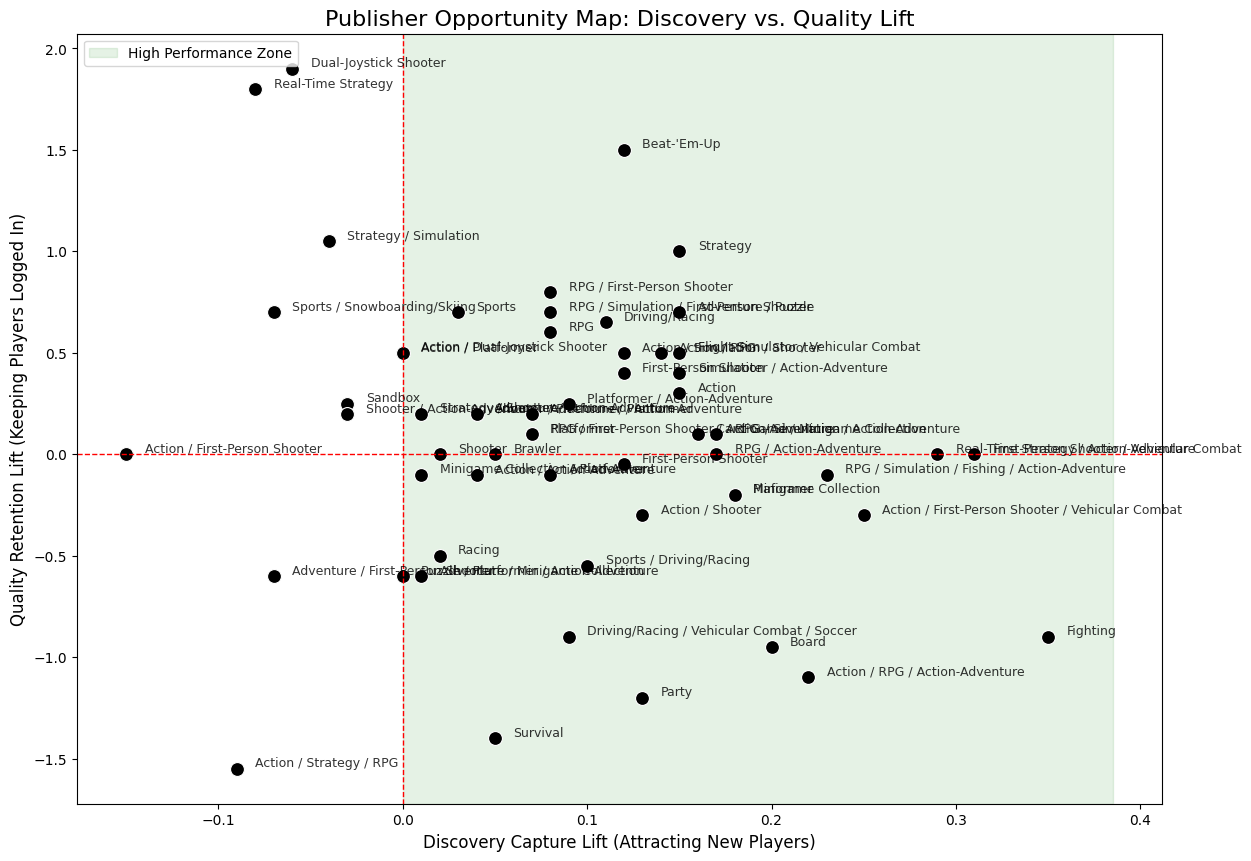

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for unique genres (since lift is calculated per genre pair)
plot_df = merged[merged['has_gamepass_remediation'] == True].copy()
plot_df = remove_outliers(plot_df, ['discovery_lift', 'quality_lift'])
plt.figure(figsize=(14, 10))

# 1. Create the Shaded High-Performance Quadrant
# This highlights the area where BOTH Discovery and Quality lift are positive
plt.axvspan(0, plot_df['discovery_lift'].max() * 1.1, 0, plot_df['quality_lift'].max() * 1.1, 
            color='green', alpha=0.1, label='High Performance Zone')

# 2. Draw the Scatter Plot
sns.scatterplot(data=plot_df, x='discovery_lift', y='quality_lift', s=100, color='black')

# 3. Add Labels Directly to the Dots
# We iterate through the dataframe to place text next to each point
for i in range(plot_df.shape[0]):
    plt.text(x=plot_df.discovery_lift.iloc[i] + 0.01, 
             y=plot_df.quality_lift.iloc[i] + 0.01, 
             s=plot_df.Genre.iloc[i], 
             fontsize=9, alpha=0.8)

# 4. Add Baseline Crossing Lines
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(0, color='red', linestyle='--', linewidth=1)

# Formatting for clarity
plt.title('Publisher Opportunity Map: Discovery vs. Quality Lift', fontsize=16)
plt.xlabel('Discovery Capture Lift (Attracting New Players)', fontsize=12)
plt.ylabel('Quality Retention Lift (Keeping Players Logged In)', fontsize=12)
plt.grid(False) # Clean look
plt.show()

In [47]:
def add_comprehensive_baselines(df):
    # Metrics we want to analyze
    metrics = ['momentum', 'discovery_capture', 'quality_retention']
    
    for metric in metrics:
        # 1. Calculate the 'Genre' Median (Broad Baseline)
        df[f'genre_median_{metric}'] = df.groupby('Genre')[metric].transform('median')
        
        # 2. Calculate the 'Genre + ESRB' Median (Conditioned Baseline)
        # This gives you the context: "How do M-rated Action games usually perform?"
        df[f'conditioned_median_{metric}'] = df.groupby(['Genre', 'esrb'])[metric].transform('median')
        
        # 3. Calculate the 'Relative Lift' (for Streamlit charts)
        # Positive = Overperforming, Negative = Underperforming
        df[f'lift_vs_niche_{metric}'] = df[metric] - df[f'conditioned_median_{metric}']
        
        # 4. Standardized ML Feature (Robust Z-Score)
        # For ML, we use Median Absolute Deviation (MAD) if data is skewed, 
        # but a standard STD works for basic normalization
        std_dev = df.groupby(['Genre', 'esrb'])[metric].transform('std')
        df[f'zscore_{metric}'] = (df[metric] - df[f'conditioned_median_{metric}']) / std_dev
        
    return df

# Apply to your main DataFrame
DF = add_comprehensive_baselines(DF)

In [48]:
DF.head(10)

,Game,MS_Store_Link,ProductID,System,xCloud,Status,Added,Removed,Months,Release,...,lift_vs_niche_momentum,zscore_momentum,genre_median_discovery_capture,conditioned_median_discovery_capture,lift_vs_niche_discovery_capture,zscore_discovery_capture,genre_median_quality_retention,conditioned_median_quality_retention,lift_vs_niche_quality_retention,zscore_quality_retention
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,Dec 2025,NaN,0.50,Dec 2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,Nov 2025,NaN,1.27,Dec 2014,...,12.50,0.609223,0.070,0.10,0.04,0.228606,0.10,0.20,-0.20,-0.103651
2,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,Nov 2025,NaN,1.27,Dec 2014,...,12.50,0.609223,0.070,0.10,0.04,0.228606,0.10,0.20,-0.20,-0.103651
3,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,NaN,Active,Nov 2025,NaN,1.43,Nov 2025,...,-6.62,-0.192454,0.000,0.10,0.41,3.155762,-0.50,0.00,0.60,0.335292
4,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,NaN,Active,Oct 2025,NaN,1.83,Oct 2025,...,0.00,NaN,0.460,0.46,0.00,NaN,0.30,0.30,0.00,NaN
5,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,Oct 2025,NaN,1.93,Nov 2022,...,3.31,0.205138,0.040,0.04,0.26,2.472495,0.10,0.10,-0.10,-0.116688
6,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,Oct 2025,NaN,2.13,Jan 1983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,NaN,Active,Oct 2025,NaN,2.10,Oct 2025,...,-13.33,-0.783591,0.015,0.20,0.42,2.540861,0.15,0.30,0.30,0.178105
8,Baldur's Gate and Baldur's Gate II: Enhanced E...,https://www.xbox.com/en-us/games/store/Baldurs...,9NCNBWZSHZR5,PC,NaN,Active,Oct 2025,NaN,2.33,Oct 2019,...,0.00,0.000000,0.015,0.00,0.00,0.000000,0.15,-0.20,-0.40,-0.231002
9,Sopa: Tale of the Stolen Potato,https://www.xbox.com/en-us/games/store/sopa-ta...,9N221ZTFGQB0,Xbox / PC,Yes,Active,Oct 2025,NaN,2.40,Oct 2025,...,-3.32,-0.096701,0.070,0.22,1.11,2.326718,0.10,0.25,-0.25,-0.115316


In [51]:
for col in DF.columns: 
    percentage = (DF[col].isna().sum()/len(DF[col]))
    print(percentage, col)

0.0 Game
0.0 MS_Store_Link
0.0 ProductID
0.0 System
0.6404421326397919 xCloud
0.0 Status
0.0 Added
0.2425227568270481 Removed
0.0 Months
0.0 Release
0.0 Age
0.020156046814044214 Metacritic
0.19960988296488946 Completion
0.005851755526657998 Genre
0.8842652795838751 Series X|S
0.0 product_id
0.0 title
0.0013003901170351106 publisher
0.0013003901170351106 developer
0.0 release_date
0.0006501950585175553 short_description
0.0 bundle_count
0.9986996098829649 is_xpa
0.0 asset_count
0.0 category
0.0013003901170351106 esrb
0.0 esrb_descriptors
0.0 has_gamepass_remediation
0.0 prices
0.0 rating_alltime.AggregateTimeSpan
0.0 rating_alltime.AverageRating
0.0 rating_alltime.PlayCount
0.0 rating_alltime.RatingCount
0.0 rating_alltime.RentalCount
0.0 rating_alltime.TrialCount
0.0 rating_alltime.PurchaseCount
0.0 rating_7_days.AggregateTimeSpan
0.0 rating_7_days.AverageRating
0.0 rating_7_days.PlayCount
0.0 rating_7_days.RatingCount
0.0 rating_7_days.RentalCount
0.0 rating_7_days.TrialCount
0.0 rati